In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 525.1 kB/s eta 0:01:14
   ---------------------------------------- 0.1/38.8 MB 737.3 kB/s eta 0:00:53
   ---------------------------------------- 0.1/38.8 MB 774.0 kB/s eta 0:00:51
   ---------------------------------------- 0.2/38.8 MB 794.9 kB/s eta 0:00:49
   ---------------------------------------- 0.3/38.8 MB 962.4 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.8 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.4/38.8 MB 1.2 MB/s eta 0:00:32
    ---------------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/eb/f1/828bbccc84a72db960a7d116f55f3f6aec9f5658f5d32ce9db20142d5742/tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/ae/4e/44ce609139065035c56fe570fe7f0ee8d06180c99a424bac588472052c5d/tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install keras


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install setuptools


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/aa/ce/c0b912f2f31aeb1b756a6ba56bcd84dd1f8a148470526a48515a3f4d48cd/scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/aa/7d/43ab67228ef98c6b5dd42ab386eae2d7877036970a0d7e3dd3eb47a0d530/scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 639.7 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.wh


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
# Set paths for images and masks
image_dir = 'images'
mask_dir = 'masks'
target_size = (256, 256)


In [4]:
# Function to preprocess images and masks
def preprocess_image(image_path, mask_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size) / 255.0
    mask = cv2.resize(mask, target_size) / 255.0
    return image, mask

In [5]:
# Load and preprocess dataset
images, masks = [], []
for img_file, mask_file in zip(os.listdir(image_dir), os.listdir(mask_dir)):
    img_path, mask_path = os.path.join(image_dir, img_file), os.path.join(mask_dir, mask_file)
    image, mask = preprocess_image(img_path, mask_path)
    images.append(image)
    masks.append(mask)

In [6]:
len(images) , len(images[0])

(704, 256)

In [7]:
len(masks) , len(masks[0])

(704, 256)

In [8]:
# Convert to NumPy arrays and reshape for model compatibility
images = np.array(images).reshape(-1, 256, 256, 1)
masks = np.array(masks).reshape(-1, 256, 256, 1) # what -1 means

In [9]:
images.shape, masks.shape

((704, 256, 256, 1), (704, 256, 256, 1))

In [10]:
split_idx = int(0.8 * len(images))
train_images, val_images = images[:split_idx], images[split_idx:]
train_masks, val_masks = masks[:split_idx], masks[split_idx:]

In [11]:
train_images.shape, val_images.shape

((563, 256, 256, 1), (141, 256, 256, 1))

In [12]:
train_masks.shape, val_masks.shape

((563, 256, 256, 1), (141, 256, 256, 1))

In [13]:
# Define the U-Net model
def build_unet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = Concatenate()([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = Concatenate()([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    return Model(inputs, outputs)


In [14]:
model = build_unet()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_masks,
                    validation_data=(val_images, val_masks),
                    batch_size=16, epochs=10, verbose=1)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1263s 35s/step - accuracy: 0.7463 - loss: 0.4189 - val_accuracy: 0.7478 - val_loss: 0.3880
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1102s 31s/step - accuracy: 0.7572 - loss: 0.3915 - val_accuracy: 0.8471 - val_loss: 0.3397
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1197s 33s/step - accuracy: 0.8452 - loss: 0.3416 - val_accuracy: 0.8549 - val_loss: 0.3281
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1128s 31s/step - accuracy: 0.8483 - loss: 0.3370 - val_accuracy: 0.8270 - val_loss: 0.3581
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1095s 30s/step - accuracy: 0.8394 - loss: 0.3417 - val_accuracy: 0.8469 - val_loss: 0.3297
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1204s 34s/step - accuracy: 0.8481 - loss: 0.3334 - val_accuracy: 0.8575 - val_loss: 0.3210
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1155s 32s/step - accuracy: 0.8539 - loss: 0.3249 - val_accuracy: 0.8486 - val_loss: 0.3252
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1100s 31s/step - accuracy: 0.8529 - loss: 0.3234 - val_accu

In [39]:
val_predictions = model.predict(val_images)
val_predictions = (val_predictions > 0.5).astype(np.uint8)

5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 9s/step


In [40]:
#function to generate the segmented images
def generate_segmented_image(input_image, model, save_path=None):
    
    # Preprocess the input image
    input_preprocessed = np.expand_dims(input_image, axis=0)  # Add batch dimension

    # Predict the mask
    pred_mask = model.predict(input_preprocessed)[0]  # Remove batch dimension
    pred_mask_binary = (pred_mask > 0.5).astype(np.uint8)

    # Rescale original image and mask
    original_rescaled = (input_image.squeeze() * 255).astype(np.uint8)
    pred_mask_rescaled = (pred_mask_binary.squeeze() * 255).astype(np.uint8)

    # Create segmented image by masking the original
    segmented_image = cv2.bitwise_and(original_rescaled, pred_mask_rescaled)

    # Optional: Save the segmented image
    if save_path:
        os.makedirs(save_path, exist_ok=True)  # Ensure the directory exists
        save_path = os.path.join(save_path, "segmented_image.png")
        cv2.imwrite(save_path, segmented_image)
        print(f"Segmented image saved to: {save_path}")
    return segmented_image


In [41]:
generate_segmented_image(images[0], model, 'segmented_images' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Segmented image saved to: segmented_images\segmented_image.png


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [43]:

# Flatten the masks and predictions
val_masks_binary = (val_masks > 0.5).astype(np.uint8).flatten()
val_predictions_binary = (val_predictions > 0.5).astype(np.uint8).flatten()

In [44]:
# Calculate metrics
accuracy = accuracy_score(val_masks_binary, val_predictions_binary)
precision = precision_score(val_masks_binary, val_predictions_binary)
recall = recall_score(val_masks_binary, val_predictions_binary)
f1 = f1_score(val_masks_binary, val_predictions_binary)



In [45]:
# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(val_masks_binary, val_predictions_binary)



Accuracy: 0.8623
Precision: 0.8133
Recall: 0.5872
F1-Score: 0.6820


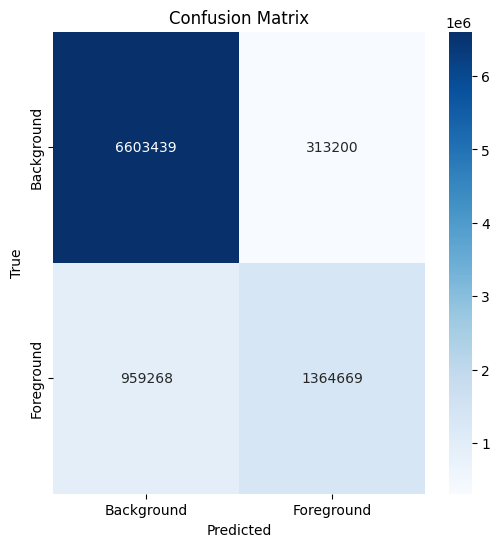

In [46]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Foreground"], yticklabels=["Background", "Foreground"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



C:\Users\91879\AppData\Local\Temp\ipykernel_23944\1976678183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette="viridis")


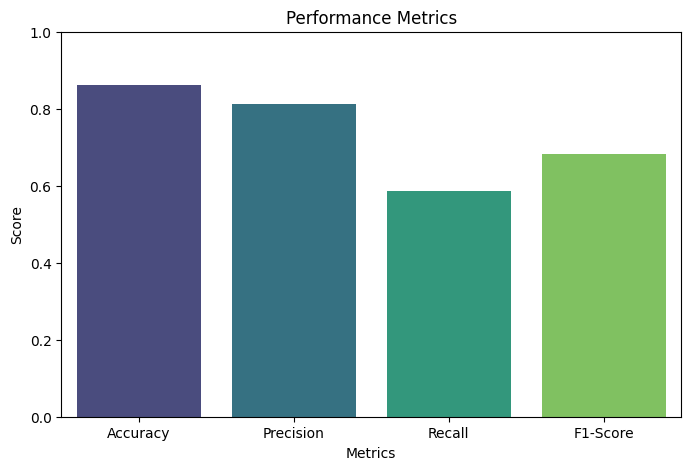

In [47]:
# Plot metrics visually
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metric_values, palette="viridis")
plt.ylim(0, 1)
plt.title("Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()

